# Financial Analysis in Python

What you will learn in this tutorial
------------------------------------

* Timeseries analysis using Pandas
* Using Google Trends to predict market movements
* Build your own trading strategy using Zipline
* Common trading strategies:
   * Momentum trading
   * Mean-reversion

Different stages towards a successful trading strategy
------------------------------------------------------

1. Data analysis / Idea generation
   * Pandas + Matplotlib (Part I)
2. Backtest strategy
   * Pandas can be used but many limitations (Part II)
   * -> Zipline (Part III)
3. Optimize
   * See my previous [PyData talk](http://blog.quantopian.com/zipline_in_the_cloud/)
4. Forward test strategy (paper trading)
   * Trivial on Quantopian (Part IV)
5. Live trading!
   * Coming soon...

# Pandas basics (Data analysis / Idea generation)

In [1]:
%pylab inline
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime

import pandas as pd
import pandas.io.data
from pandas import Series, DataFrame
pd.__version__

'0.15.2'

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'1.4.3'

Creating/loading time series data
===================

* From Python structures
* From Yahoo finance
* From CSV files

### From Python structures

In [4]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series([1, 2, 3, 4, 5], index=labels)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
'b' in s

True

In [6]:
s['b']

2

In [8]:
mapping = s.to_dict()
mapping

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [9]:
Series(mapping)

a    1
b    2
c    3
d    4
e    5
dtype: int64

### From Yahoo finance

In [10]:
aapl = pd.io.data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2006, 10, 1), 
                                 end=datetime.datetime(2012, 1, 1))
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.099990,75.869987,74.300032,74.860031,178159800,10.045499
2006-10-03,74.449968,74.949980,73.189973,74.080020,197677200,9.940829
2006-10-04,74.099967,75.459998,73.160012,75.379990,207270700,10.115272
2006-10-05,74.529977,76.160001,74.130001,74.829997,170970800,10.041468
2006-10-06,74.420008,75.040002,73.810027,74.220023,116739700,9.959616


### From CSV files

In [11]:
aapl.to_csv('data/aapl_ohlc.csv')
!head data/aapl_ohlc.csv

Date,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.09999,75.869987,74.300032,74.860031,178159800,10.045499000000001
2006-10-03,74.449968,74.94998000000001,73.189973,74.08001999999999,197677200,9.940828999999999
2006-10-04,74.099967,75.459998,73.160012,75.37999,207270700,10.115272000000001
2006-10-05,74.529977,76.160001,74.13000100000001,74.82999699999999,170970800,10.041468
2006-10-06,74.420008,75.040002,73.810027,74.220023,116739700,9.959616
2006-10-09,73.80001999999999,75.07996899999999,73.530027,74.630013,109555600,10.014632
2006-10-10,74.53999,74.580031,73.07999699999999,73.810027,132897100,9.904598
2006-10-11,73.41999100000001,73.979991,72.600013,73.230007,142963800,9.826765
2006-10-12,73.60996899999999,75.39000300000001,73.600029,75.260007,148213800,10.099172


In [12]:
df = pd.read_csv('data/aapl_ohlc.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.099990,75.869987,74.300032,74.860031,178159800,10.045499
2006-10-03,74.449968,74.949980,73.189973,74.080020,197677200,9.940829
2006-10-04,74.099967,75.459998,73.160012,75.379990,207270700,10.115272
2006-10-05,74.529977,76.160001,74.130001,74.829997,170970800,10.041468
2006-10-06,74.420008,75.040002,73.810027,74.220023,116739700,9.959616


In [13]:
df.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2006-10-02, ..., 2011-12-30]
Length: 1323, Freq: None, Timezone: None

Series and DataFrame: First steps
=================================

* Indexing
* Slicing
* Creating new columns

In [14]:
ts = df['Close'][-10:]
ts

Date
2011-12-16    381.020016
2011-12-19    382.210003
2011-12-20    395.950024
2011-12-21    396.449982
2011-12-22    398.549976
2011-12-23    403.329979
2011-12-27    406.529972
2011-12-28    402.640003
2011-12-29    405.120033
2011-12-30    404.999977
Name: Close, dtype: float64

A DataFrame is a collection of Series objects. Slicing out a DataFrame column returns a Series.

In [15]:
type(ts)

pandas.core.series.Series

In [16]:
date = ts.index[5]
date

Timestamp('2011-12-23 00:00:00')

In [17]:
ts[date]

403.32997899999998

In [18]:
ts[5]

403.32997899999998

We can also select multiple columns.

In [19]:
df[['Open', 'Close']].head()

,Open,Close
Date,,
2006-10-02,75.099990,74.860031
2006-10-03,74.449968,74.080020
2006-10-04,74.099967,75.379990
2006-10-05,74.529977,74.829997
2006-10-06,74.420008,74.220023


New columns can be added on the fly.

In [20]:
df['diff'] = df.Open - df.Close
df.head()

,Open,High,Low,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,75.099990,75.869987,74.300032,74.860031,178159800,10.045499,0.239959
2006-10-03,74.449968,74.949980,73.189973,74.080020,197677200,9.940829,0.369948
2006-10-04,74.099967,75.459998,73.160012,75.379990,207270700,10.115272,-1.280023
2006-10-05,74.529977,76.160001,74.130001,74.829997,170970800,10.041468,-0.300020
2006-10-06,74.420008,75.040002,73.810027,74.220023,116739700,9.959616,0.199985


...and deleted on the fly.

In [21]:
del df['diff']
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.099990,75.869987,74.300032,74.860031,178159800,10.045499
2006-10-03,74.449968,74.949980,73.189973,74.080020,197677200,9.940829
2006-10-04,74.099967,75.459998,73.160012,75.379990,207270700,10.115272
2006-10-05,74.529977,76.160001,74.130001,74.829997,170970800,10.041468
2006-10-06,74.420008,75.040002,73.810027,74.220023,116739700,9.959616


Common Financial Computations
-----------------------------

* Moving Average
* Returns

In [22]:
close_px = df['Adj Close']

In [23]:
mavg = pd.rolling_mean(close_px, 40)
mavg[-10:]

Date
2011-12-16    52.160854
2011-12-19    52.125092
2011-12-20    52.092149
2011-12-21    52.087720
2011-12-22    52.080843
2011-12-23    52.076280
2011-12-27    52.081581
2011-12-28    52.074402
2011-12-29    52.103286
2011-12-30    52.128749
dtype: float64

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [24]:
rets = close_px / close_px.shift(1) - 1
rets.head()

Date
2006-10-02         NaN
2006-10-03   -0.010420
2006-10-04    0.017548
2006-10-05   -0.007296
2006-10-06   -0.008151
Name: Adj Close, dtype: float64

Or alternatively `.pct_change()`.

In [25]:
close_px.pct_change().head()

Date
2006-10-02         NaN
2006-10-03   -0.010420
2006-10-04    0.017548
2006-10-05   -0.007296
2006-10-06   -0.008151
Name: Adj Close, dtype: float64

Plotting Basics
---------------

Series and DataFrames have an associated `.plot()` command (uses Matplotlib behind the scenes).

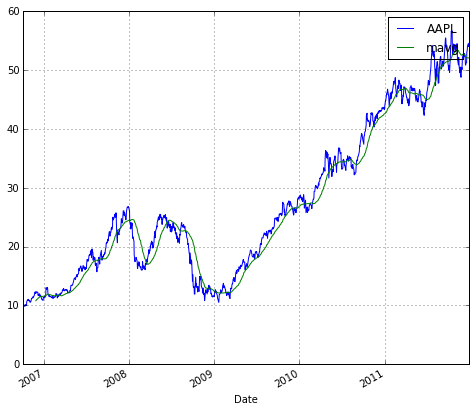

In [26]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Optional: If there is time...

In [32]:
df = pd.io.data.get_data_yahoo(['AAPL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
df.head()

,AAPL,GE,IBM,KO,MSFT,PEP
Date,,,,,,
2010-01-04,28.718094,12.866287,118.634733,24.265826,26.769336,52.077521
2010-01-05,28.767737,12.932908,117.201630,23.972286,26.777984,52.706803
2010-01-06,28.310151,12.866287,116.440284,23.963779,26.613650,52.179566
2010-01-07,28.257821,13.532503,116.037224,23.904219,26.336875,51.847917
2010-01-08,28.445687,13.823972,117.201630,23.461786,26.518508,51.677840


In [33]:
rets = df.pct_change()

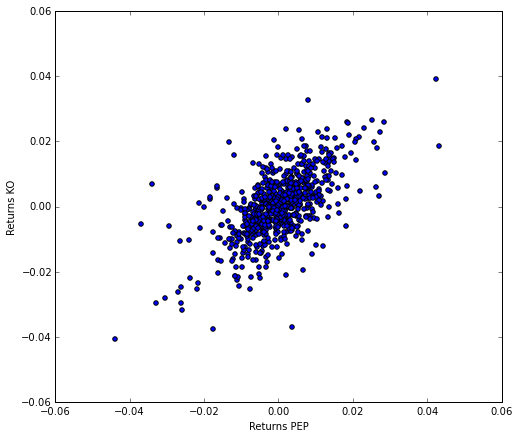

In [34]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns PEP')
plt.ylabel('Returns KO')

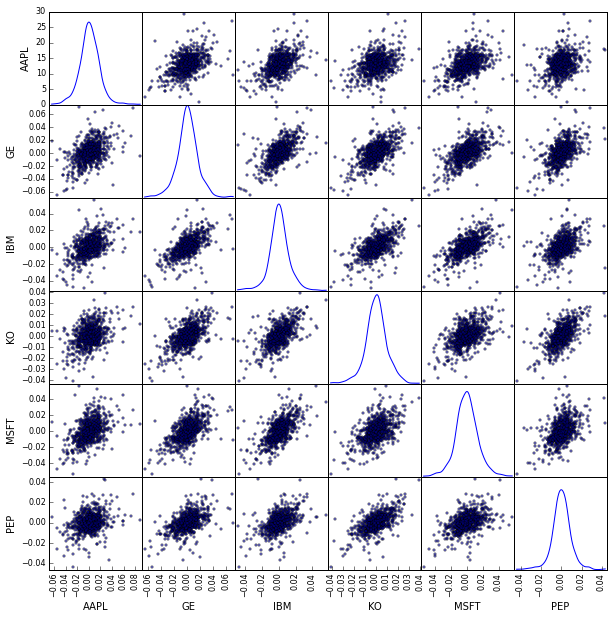

In [35]:
pd.scatter_matrix(rets, diagonal='kde', figsize=(10, 10));

In [36]:
corr = rets.corr()
corr

,AAPL,GE,IBM,KO,MSFT,PEP
AAPL,1.000000,0.457052,0.501587,0.388006,0.472767,0.308963
GE,0.457052,1.000000,0.609330,0.593856,0.600065,0.533503
IBM,0.501587,0.609330,1.000000,0.601483,0.646124,0.491088
KO,0.388006,0.593856,0.601483,1.000000,0.523480,0.635843
MSFT,0.472767,0.600065,0.646124,0.523480,1.000000,0.477424
PEP,0.308963,0.533503,0.491088,0.635843,0.477424,1.000000


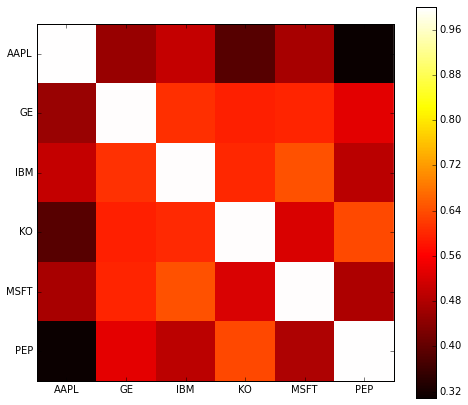

In [37]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

One thing we are often interested in is the relationship of expected returns and the risk we are taking one. Often there is a trade-off between the two.

Here we use `plt.annotate` to put labels on the scatterplot.

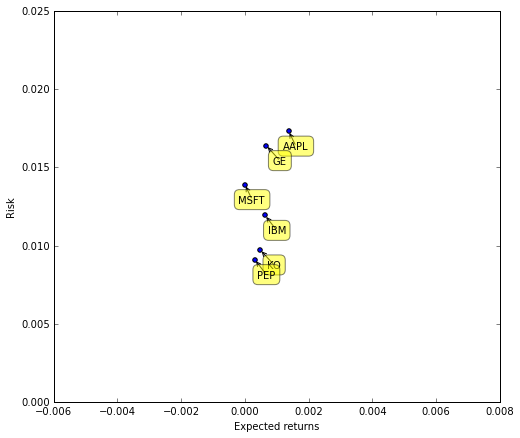

In [38]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Data alignment and dealing with missing values
==============

* Join, merge, concatenate
* Filling NaNs

Lets pull some more securities from Yahoo finance and build a DataFrame of the adjusted closing prices.

In [41]:
series_list = []
securities = ['AAPL', 'GOOG', 'IBM', 'MSFT']
for security in securities:
    s = pd.io.data.get_data_yahoo(security, start=datetime.datetime(2011, 10, 1), end=datetime.datetime(2015, 1, 1))['Adj Close']
    s.name = security # Rename series to match security name
    series_list.append(s)

`pd.concat` can be used to concatenate multiple `Series` into one `DataFrame`.

In [42]:
df = pd.concat(series_list, axis=1)
df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,50.267733,NaN,160.215759,22.067647
2011-10-04,49.985934,NaN,161.556371,22.796338
2011-10-05,50.757520,NaN,163.507179,23.291127
2011-10-06,50.639437,NaN,167.982011,23.695956
2011-10-07,49.623615,NaN,168.629195,23.614990


In [43]:
df.ix[0, 'AAPL'] = np.nan
df.ix[1, ['GOOG', 'IBM']] = np.nan
df.ix[[1, 2, 3], 'MSFT'] = np.nan

df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,NaN,160.215759,22.067647
2011-10-04,49.985934,NaN,NaN,NaN
2011-10-05,50.757520,NaN,163.507179,NaN
2011-10-06,50.639437,NaN,167.982011,NaN
2011-10-07,49.623615,NaN,168.629195,23.614990


Pandas has great support for computing with missing values.

In [44]:
(df.AAPL + df.GOOG).head()

Date
2011-10-03   NaN
2011-10-04   NaN
2011-10-05   NaN
2011-10-06   NaN
2011-10-07   NaN
dtype: float64

One common approacht to impute missing values in time series is forward filling.

In [45]:
df.ffill().head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,NaN,160.215759,22.067647
2011-10-04,49.985934,NaN,160.215759,22.067647
2011-10-05,50.757520,NaN,163.507179,22.067647
2011-10-06,50.639437,NaN,167.982011,22.067647
2011-10-07,49.623615,NaN,168.629195,23.614990
